In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import ipywidgets as widgets
from ipywidgets import interactive

In [2]:
# стаж репетитора (признак)
x = np.array([1, 1, 2, 1, 3, 0, 5, 10, 1, 2])
X = np.vstack([np.ones_like(x), x]).T

In [3]:
# средний балл ЕГЭ (целевая переменная)
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

In [4]:
def calc_mse(y, y_pred):
    """средняя квадратическая ошибка"""
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    """средняя абсолютная ошибка"""
    err = np.mean(np.abs(y - y_pred))
    return err

1. Проведите небольшое исследование алгоритма градиентного спуска на данных из урока. Оцените влияние значений скорости обучения (`eta`) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?

In [5]:
def gradient_descent(n, w0, eta, iterations, quiet=False):
    """градиентный спуск"""
    if not quiet:
        print(f"{eta = } {iterations = }")
    w = w0
    # errors = np.array([])
    for i in range(iterations):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        for j in range(w.shape[0]):
            w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
        if (i % ((iterations - 1) / 10) == 0) and not quiet:
            print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986
        # errors.append(err)
    return err

In [6]:
# грубая оценка
for i in (1, 2, 3, 4, 5):
    for j in (1, 2, 3, 4):
        eta = 10**(-i)
        iterations = 10**j+1
        gradient_descent(X.shape[0], np.array([1, 0.5]), eta, iterations)
        print("="*20)
    print("*"*40)

eta = 0.1 iterations = 11
0 [12.02 34.5 ] 3173.15
1 [  3.156  -36.5104] 9346.1224
2 [ 32.990208 104.438848] 35107.449878655985
3 [ -16.43603456 -181.69749632] 140350.07427772493
4 [ 92.81387044 393.38593091] 568525.6785529462
5 [-118.82958772 -767.58419997] 2309126.775824271
6 [ 315.56011381 1571.53304955] 9383808.774616294
7 [ -553.26909472 -3145.45471432] 38137978.69967565
8 [1204.50117567 6362.95298074] 155005014.43061155
9 [ -2333.65460945 -12807.23033437] 629993066.3371575
10 [ 4804.31608631 25839.36263891] 2560508313.4314423
eta = 0.1 iterations = 101
0 [12.02 34.5 ] 3173.15
10 [ 4804.31608631 25839.36263891] 2560508313.4314423
20 [ 5290522.80147805 28650212.14081741] 3149426002038126.0
30 [5.86742707e+09 3.17746221e+10] 3.87379518312021e+21
40 [6.50729237e+12 3.52397660e+13] 4.764769551992779e+27
50 [7.21693748e+15 3.90827972e+16] 5.860668365360226e+33
60 [8.00397210e+18 4.33449257e+19] 7.208624323576985e+39
70 [8.87683585e+21 4.80718555e+22] 8.866610666046726e+45
80 [9.84488874

<ipython-input-4-d8c09050bc3c>:3: RuntimeWarning: overflow encountered in square
  err = np.mean((y - y_pred)**2)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


2000 [nan nan] nan
3000 [nan nan] nan
4000 [nan nan] nan
5000 [nan nan] nan
6000 [nan nan] nan
7000 [nan nan] nan
8000 [nan nan] nan
9000 [nan nan] nan
10000 [nan nan] nan
****************************************
eta = 0.01 iterations = 11
0 [2.102 3.9  ] 3173.15
1 [3.00516  6.249896] 2085.1833639999995
2 [3.76806221 7.86665805] 1543.8856327929857
3 [4.43163475 8.97165466] 1269.450790627765
4 [5.02447601 9.71948649] 1125.3962478602255
5 [ 5.56657319 10.21812369] 1045.1468702184588
6 [ 6.07189929 10.54296976] 996.2256404018397
7 [ 6.55022688 10.74668383] 962.7873115334002
8 [ 7.00839478 10.86604035] 937.0990290056232
9 [ 7.45119279 10.92672004] 915.3849211067269
10 [ 7.88197949 10.94665576] 895.7992568721307
eta = 0.01 iterations = 101
0 [2.102 3.9  ] 3173.15
10 [ 7.88197949 10.94665576] 895.7992568721307
20 [11.82321845 10.44288316] 734.1943046789495
30 [15.33838126  9.79996576] 604.3598272772635
40 [18.50371626  9.21563317] 499.01844357436784
50 [21.35487986  8.68914872] 413.548771507

3000 [3.62543141 7.13081086] 1368.9237488281874
4000 [4.29226883 8.26599017] 1194.3637542883348
5000 [4.89602163 9.08515129] 1090.13671746017
6000 [5.45197348 9.67079699] 1024.5621473655099
7000 [ 5.97144001 10.083944  ] 980.3069203431576
8000 [ 6.46280195 10.36971808] 947.8860859647697
9000 [ 6.93226926 10.56149199] 922.107766845317
10000 [ 7.38444627 10.68394611] 900.1284957199632
****************************************


In [7]:
# более аккуратная оценка
for i in (2, 3, 4):
    for j in (3, 4, 5):
        eta = 10**(-i)
        iterations = 10**j+1
        gradient_descent(X.shape[0], np.array([1, 0.5]), eta, iterations)
        print("="*20)
    print("*"*40)

eta = 0.01 iterations = 1001
0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001853
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219864
eta = 0.01 iterations = 10001
0 [2.102 3.9  ] 3173.15
1000 [47.23088237  3.91094704] 45.937500872219864
2000 [47.23214282  3.91071429] 45.93750000000001
3000 [47.23214286  3.91071429] 45.937499999999986
4000 [47.23214286  3.91071429] 45.9375
5000 [47.23214286  3.91071429] 45.9375
6000 [47.23214286  3.91071429] 45.9375
7000 [47.23214286  3.91071429] 45.9375
8000 [47.23214286  3.91071429] 45.9375
9000 [47.23214286  3.91071429] 45.9375
10000 [47.23214286  3.91

In [8]:
# def f(m, b):
#     plt.figure(2)
#     x = np.linspace(0, 10, num=1000)
#     plt.plot(x, m * x + b)
#     plt.ylim(0, 10)
#     plt.xlim(0, 10)
#     plt.show()

# interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-10, 10, 1))
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
# interactive_plot

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

xx = np.linspace(2, 5, 4*10)
yy = np.linspace(1, 4, 4*10)
XX, YY = np.meshgrid(xx, yy)
xx, yy

(array([2.        , 2.07692308, 2.15384615, 2.23076923, 2.30769231,
        2.38461538, 2.46153846, 2.53846154, 2.61538462, 2.69230769,
        2.76923077, 2.84615385, 2.92307692, 3.        , 3.07692308,
        3.15384615, 3.23076923, 3.30769231, 3.38461538, 3.46153846,
        3.53846154, 3.61538462, 3.69230769, 3.76923077, 3.84615385,
        3.92307692, 4.        , 4.07692308, 4.15384615, 4.23076923,
        4.30769231, 4.38461538, 4.46153846, 4.53846154, 4.61538462,
        4.69230769, 4.76923077, 4.84615385, 4.92307692, 5.        ]),
 array([1.        , 1.07692308, 1.15384615, 1.23076923, 1.30769231,
        1.38461538, 1.46153846, 1.53846154, 1.61538462, 1.69230769,
        1.76923077, 1.84615385, 1.92307692, 2.        , 2.07692308,
        2.15384615, 2.23076923, 2.30769231, 2.38461538, 2.46153846,
        2.53846154, 2.61538462, 2.69230769, 2.76923077, 2.84615385,
        2.92307692, 3.        , 3.07692308, 3.15384615, 3.23076923,
        3.30769231, 3.38461538, 3.46153846, 3.

In [10]:
Z = np.empty([len(xx), len(yy)])
ii = 0
for i in xx:
    jj = 0
    for j in yy:
        eta = 10**(-i)
        iterations = 10**int(j)+1
        Z[ii, jj] = gradient_descent(X.shape[0], np.array([1, 0.5]), eta, iterations, quiet=True)
        jj += 1
    ii += 1

In [11]:
Z = Z.T
print(Z.shape)
print(np.exp(-(XX ** 2 + YY ** 2)).shape)

(40, 40)
(40, 40)


<IPython.core.display.Javascript object>


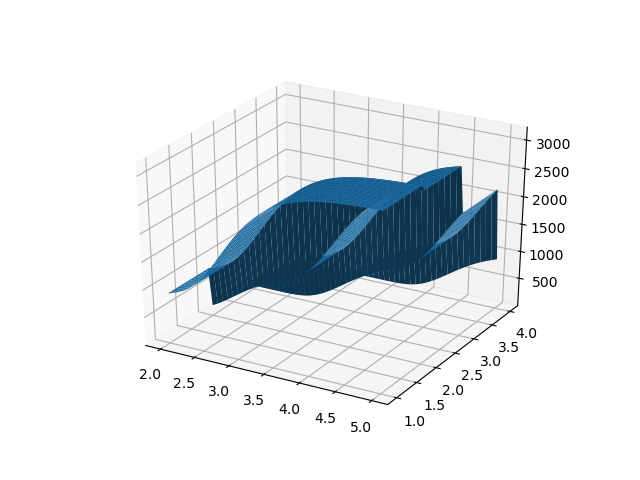

In [12]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(XX, YY, Z)
plt.show()

*Важно при использовании метода градиентного спуска правильно подбирать шаг. Если длина шага будет слишком мала, то метод будет слишком медленно приближаться к правильному ответу, и потребуется большое число итераций для достижения сходимости. А если длина, наоборот, будет слишком большой, появится вероятность «перепрыгивания» алгоритма через минимум функции или вообще отсутствия сходимости градиентного спуска.*

*Ускорить процесс вычисления весов можно с помощью использования переменного размера шага: на начальных этапах берётся большой шаг, который с увеличением количества итераций снижается. Одна из таких методик — вычисление на каждой итерации размера шага по формуле: $\eta_{k} = \frac{c}{k},$ где $c$ — некоторая константа, а $k$ — номер шага.*

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте её:

In [13]:
n = X.shape[0]
eta = 1e-3
iterations = 1001
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    w0 = (eta * (1/n * 2 * np.sum(X.T * (y_pred - y))))  # ошибка!
    w1 = (eta * (1/n * 2 * np.sum(X.T * (y_pred - y), axis=1)))  # вариант 1
    w2 = (eta * (1/n * 2 * X.T @ (y_pred - y)))  # вариант 2
    w -= w2
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [1.1102 0.84  ] 3173.15
100 [ 7.43515582 10.71754582] 899.5990444359252
200 [11.44993589 10.49282195] 735.5540619653672
300 [14.98921624  9.8634316 ] 606.0048772266812
400 [18.17511588  9.27626113] 500.7989288428639
500 [21.04606457  8.74617136] 415.355423398327
600 [23.63334499  8.26841272] 345.9620646005472
700 [25.96499229  7.83785632] 289.6039104863001
800 [28.06626432  7.44984037] 243.83236130353217
900 [29.95992301  7.10016181] 206.65877484533297
1000 [31.66648131  6.78503276] 176.46806566379882


*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определённого порога.

Сколько нужно сделать итераций, если установить допустимое отклонение mse за одну итерацию в размере diff=1e-6, а значение eta=1e-2?

In [14]:
def gradient_descent_eps(n, w0, eta, eps):
    """градиентный спуск"""
    print(f"{eta = } {eps = }")
    w = w0
    norma = np.inf
    err = np.inf
    i = 0
    while (norma > eps):
        y_pred = np.dot(X, w)
        err0 = err
        err = calc_mse(y, y_pred)
        for j in range(w.shape[0]):
            w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
        if i % 100 == 0:
            print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986
        i += 1
        norma = abs(err - err0)
        # print(f"{i}: {norma}")
    print(i, w, err)
    return i

In [15]:
w = np.array([1, 0.5])
diff = 1e-6
eta = 1e-2
gradient_descent_eps(X.shape[0], w, eta, diff)

eta = 0.01 eps = 1e-06
0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001853
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
810 [47.22286276  3.91242793] 45.937547277798465


810